# File 3D: Model Comparison
## Stock Price Volatility & Sentiment ML Project

**Purpose:** Compare all three trained models and determine the best one

**Models to Compare:**
1. **Logistic Regression** - Simple baseline
2. **Support Vector Machine (SVM)** - Non-linear classifier
3. **Neural Network** - Deep learning approach

**Comparison Metrics:**
- Test Accuracy
- Precision, Recall, F1-Score
- ROC Curves and AUC
- Confusion Matrices
- Training Time (from previous files)

**Goal:** Identify which model performs best for stock price prediction

---

## Step 1: Import Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print('✅ Libraries loaded successfully!')

✅ Libraries loaded successfully!


## Step 2: Load Test Data

In [8]:
print('='*70)
print('LOADING TEST DATA')
print('='*70)

# UPDATE THIS PATH
processed_dir = '/Users/aryan/Desktop/Stock-Price-Volatility-Sentiment-ML/data/processed'

# Load test data
X_test = np.load(f'{processed_dir}/X_test_scaled.npy')
X_test_pca = np.load(f'{processed_dir}/X_test_pca.npy')
y_test = np.load(f'{processed_dir}/y_test.npy')

print('\n✅ Test data loaded!')
print(f'   X_test (full): {X_test.shape}')
print(f'   X_test (PCA): {X_test_pca.shape}')
print(f'   y_test: {y_test.shape}')
print(f'\n   Test set size: {len(y_test)} samples')
print(f'   Up days: {y_test.sum()} ({y_test.mean()*100:.1f}%)')
print(f'   Down days: {(y_test==0).sum()} ({(1-y_test.mean())*100:.1f}%)')

LOADING TEST DATA

✅ Test data loaded!
   X_test (full): (741, 23)
   X_test (PCA): (741, 7)
   y_test: (741,)

   Test set size: 741 samples
   Up days: 388 (52.4%)
   Down days: 353 (47.6%)


## Step 3: Load All Trained Models

In [9]:
print('\n' + '='*70)
print('LOADING TRAINED MODELS')
print('='*70)

# UPDATE THIS PATH
models_dir = '/Users/aryan/Desktop/Stock-Price-Volatility-Sentiment-ML/models'

# Load all models
print('\nLoading models...')

# Logistic Regression
lr_model = joblib.load(f'{models_dir}/logistic_regression.pkl')
lr_model_pca = joblib.load(f'{models_dir}/logistic_regression_pca.pkl')
print('   ✅ Logistic Regression loaded')

# SVM
svm_model = joblib.load(f'{models_dir}/svm.pkl')
svm_model_pca = joblib.load(f'{models_dir}/svm_pca.pkl')
print('   ✅ SVM loaded')

# Neural Network
nn_model = joblib.load(f'{models_dir}/neural_network.pkl')
nn_model_pca = joblib.load(f'{models_dir}/neural_network_pca.pkl')
print('   ✅ Neural Network loaded')

print('\n✅ All 6 models loaded successfully!')


LOADING TRAINED MODELS

Loading models...
   ✅ Logistic Regression loaded
   ✅ SVM loaded
   ✅ Neural Network loaded

✅ All 6 models loaded successfully!


## Step 4: Make Predictions with All Models

In [10]:
print('\n' + '='*70)
print('GENERATING PREDICTIONS')
print('='*70)

# Logistic Regression
y_pred_lr = lr_model.predict(X_test)
y_pred_lr_pca = lr_model_pca.predict(X_test_pca)
print('✅ Logistic Regression predictions complete')

# SVM
y_pred_svm = svm_model.predict(X_test)
y_pred_svm_pca = svm_model_pca.predict(X_test_pca)
print('✅ SVM predictions complete')

# Neural Network
y_pred_nn = nn_model.predict(X_test)
y_pred_nn_pca = nn_model_pca.predict(X_test_pca)
print('✅ Neural Network predictions complete')

print('\n✅ All predictions generated!')


GENERATING PREDICTIONS
✅ Logistic Regression predictions complete
✅ SVM predictions complete
✅ Neural Network predictions complete

✅ All predictions generated!


## Step 5: Calculate Accuracy for All Models

In [11]:
print('\n' + '='*70)
print('MODEL ACCURACY COMPARISON')
print('='*70)

# Calculate accuracies
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_lr_pca = accuracy_score(y_test, y_pred_lr_pca)
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_svm_pca = accuracy_score(y_test, y_pred_svm_pca)
acc_nn = accuracy_score(y_test, y_pred_nn)
acc_nn_pca = accuracy_score(y_test, y_pred_nn_pca)

# Create results DataFrame
results = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Logistic Regression (PCA)',
        'SVM',
        'SVM (PCA)',
        'Neural Network',
        'Neural Network (PCA)'
    ],
    'Test Accuracy': [acc_lr, acc_lr_pca, acc_svm, acc_svm_pca, acc_nn, acc_nn_pca],
    'Features': [23, 7, 23, 7, 23, 7]
})

results['Test Accuracy (%)'] = results['Test Accuracy'] * 100
results = results.sort_values('Test Accuracy', ascending=False).reset_index(drop=True)

print('\n')
print(results[['Model', 'Test Accuracy (%)', 'Features']].to_string(index=False))

print('\n' + '='*70)
print(f'🏆 BEST MODEL: {results.iloc[0]["Model"]}')
print(f'   Accuracy: {results.iloc[0]["Test Accuracy (%)"]:.2f}%')
print(f'   Features: {results.iloc[0]["Features"]}')
print('='*70)

# Check if target met
target_acc = 55.0
best_acc = results.iloc[0]["Test Accuracy (%)"]
if best_acc >= target_acc:
    print(f'\n🎉 SUCCESS! Best model exceeds target accuracy of {target_acc}%!')
    print(f'   Achieved: {best_acc:.2f}%')
    print(f'   Above target by: {best_acc - target_acc:.2f}%')
else:
    print(f'\n⚠️  Best accuracy ({best_acc:.2f}%) is below target ({target_acc}%)')


MODEL ACCURACY COMPARISON


                    Model  Test Accuracy (%)  Features
Logistic Regression (PCA)          51.821862         7
      Logistic Regression          51.282051        23
           Neural Network          51.147099        23
                SVM (PCA)          50.472335         7
                      SVM          50.202429        23
     Neural Network (PCA)          48.448043         7

🏆 BEST MODEL: Logistic Regression (PCA)
   Accuracy: 51.82%
   Features: 7

⚠️  Best accuracy (51.82%) is below target (55.0%)


## Step 6: Visualize Model Comparison

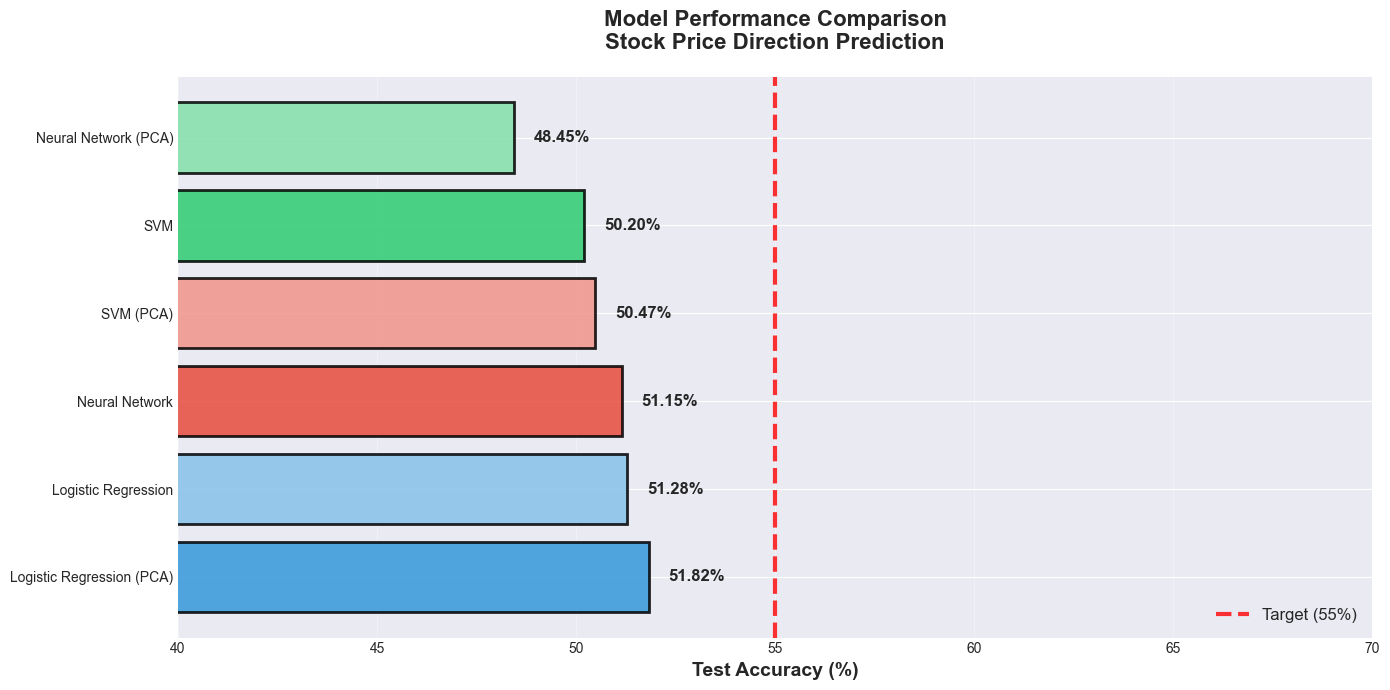

✅ Saved: 03D_model_comparison.png


In [12]:
# Bar chart comparison
fig, ax = plt.subplots(figsize=(14, 7))

colors_list = ['#3498db', '#85c1e9', '#e74c3c', '#f1948a', '#2ecc71', '#82e0aa']
bars = ax.barh(results['Model'], results['Test Accuracy (%)'], 
               color=colors_list, alpha=0.85, edgecolor='black', linewidth=2)

ax.set_xlabel('Test Accuracy (%)', fontsize=14, fontweight='bold')
ax.set_title('Model Performance Comparison\nStock Price Direction Prediction', 
            fontsize=16, fontweight='bold', pad=20)
ax.grid(alpha=0.3, axis='x')
ax.set_xlim(40, 70)

# Add accuracy labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height()/2,
           f'{width:.2f}%',
           ha='left', va='center', fontsize=12, fontweight='bold')

# Add target line
ax.axvline(x=55, color='red', linestyle='--', linewidth=3, label='Target (55%)', alpha=0.8)

# Add legend
ax.legend(fontsize=12, loc='lower right')

plt.tight_layout()
plt.savefig('/Users/aryan/Desktop/Stock-Price-Volatility-Sentiment-ML/visualizations/03D_model_comparison.png',
           dpi=300, bbox_inches='tight')
plt.show()

print('✅ Saved: 03D_model_comparison.png')

## Step 7: Detailed Comparison - Full Features Models Only

In [13]:
print('\n' + '='*70)
print('DETAILED METRICS - FULL FEATURES MODELS ONLY')
print('='*70)

models_full = [
    ('Logistic Regression', y_pred_lr, acc_lr),
    ('SVM', y_pred_svm, acc_svm),
    ('Neural Network', y_pred_nn, acc_nn)
]

for name, y_pred, acc in models_full:
    print(f'\n[{name}]')
    print(f'Accuracy: {acc*100:.2f}%')
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred, target_names=['Down (0)', 'Up (1)'], digits=3))


DETAILED METRICS - FULL FEATURES MODELS ONLY

[Logistic Regression]
Accuracy: 51.28%

Classification Report:
              precision    recall  f1-score   support

    Down (0)      0.477     0.232     0.312       353
      Up (1)      0.524     0.768     0.623       388

    accuracy                          0.513       741
   macro avg      0.500     0.500     0.468       741
weighted avg      0.501     0.513     0.475       741


[SVM]
Accuracy: 50.20%

Classification Report:
              precision    recall  f1-score   support

    Down (0)      0.476     0.445     0.460       353
      Up (1)      0.523     0.554     0.538       388

    accuracy                          0.502       741
   macro avg      0.499     0.499     0.499       741
weighted avg      0.501     0.502     0.501       741


[Neural Network]
Accuracy: 51.15%

Classification Report:
              precision    recall  f1-score   support

    Down (0)      0.483     0.357     0.410       353
      Up (1)      0.

## Step 8: Confusion Matrices Side-by-Side

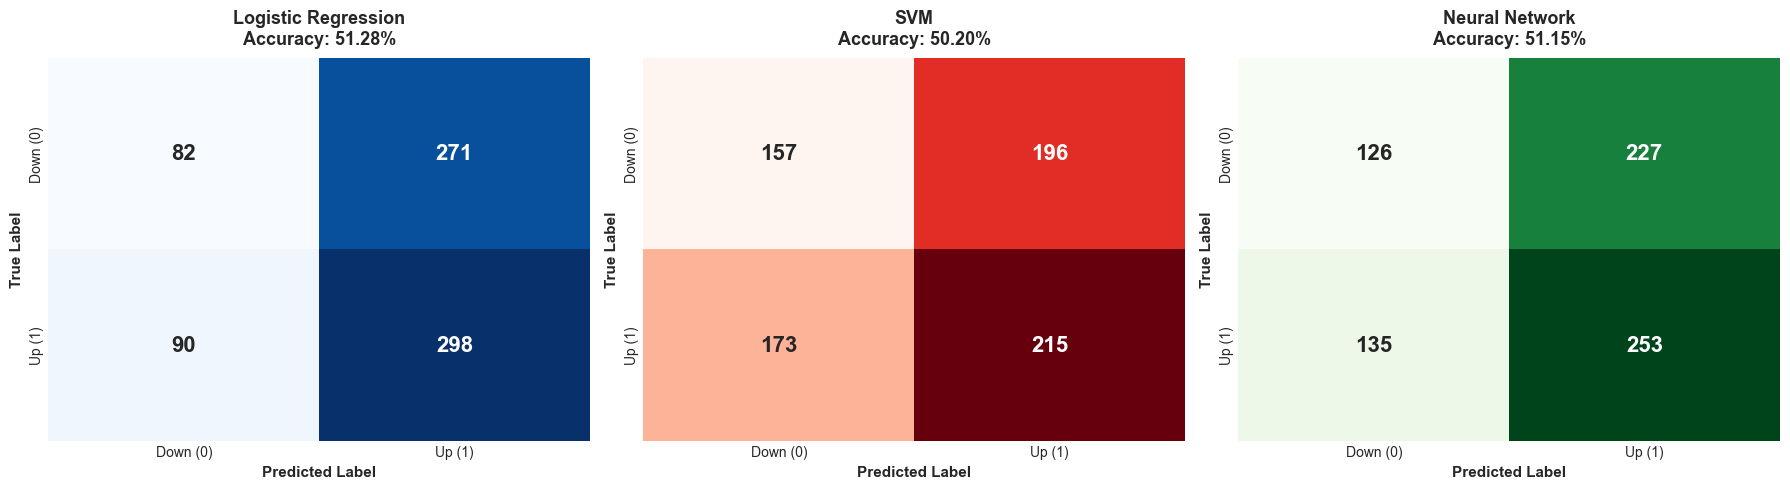

✅ Saved: 03D_confusion_matrices.png


In [14]:
# Plot confusion matrices for full features models
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_data = [
    ('Logistic Regression', y_pred_lr, acc_lr, 'Blues'),
    ('SVM', y_pred_svm, acc_svm, 'Reds'),
    ('Neural Network', y_pred_nn, acc_nn, 'Greens')
]

for i, (name, y_pred, acc, cmap) in enumerate(models_data):
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False, ax=axes[i],
               xticklabels=['Down (0)', 'Up (1)'],
               yticklabels=['Down (0)', 'Up (1)'],
               annot_kws={'size': 16, 'weight': 'bold'})
    
    axes[i].set_title(f'{name}\nAccuracy: {acc*100:.2f}%',
                     fontsize=13, fontweight='bold', pad=10)
    axes[i].set_ylabel('True Label', fontsize=11, fontweight='bold')
    axes[i].set_xlabel('Predicted Label', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('/Users/aryan/Desktop/Stock-Price-Volatility-Sentiment-ML/visualizations/03D_confusion_matrices.png',
           dpi=300, bbox_inches='tight')
plt.show()

print('✅ Saved: 03D_confusion_matrices.png')

## Step 9: ROC Curves - All Models

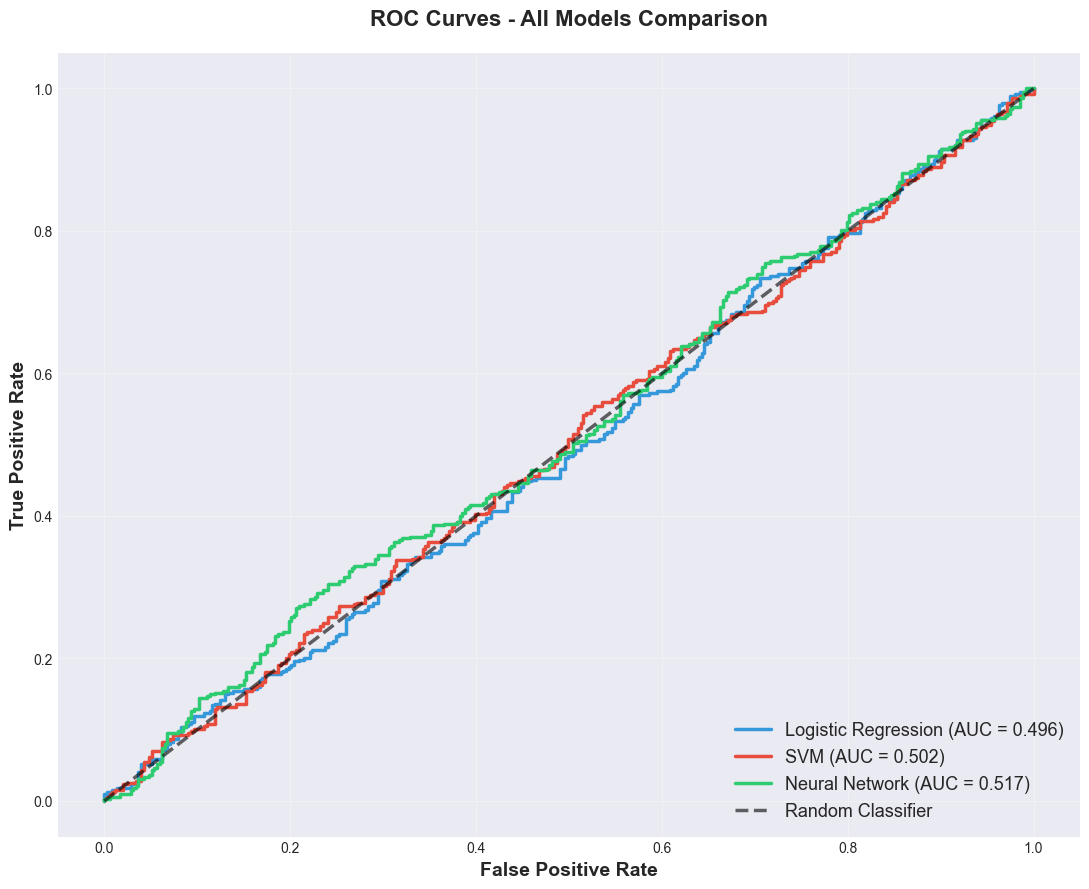

✅ Saved: 03D_roc_curves.png

📊 AUC Scores Summary:
   Logistic Regression: 0.4959
   SVM: 0.5024
   Neural Network: 0.5167


In [15]:
# Calculate ROC curves for all full features models
fig, ax = plt.subplots(figsize=(11, 9))

# Logistic Regression
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
ax.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})', 
        linewidth=2.5, color='#3498db')

# SVM
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
ax.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.3f})', 
        linewidth=2.5, color='#e74c3c')

# Neural Network
y_pred_proba_nn = nn_model.predict_proba(X_test)[:, 1]
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_proba_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)
ax.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_nn:.3f})', 
        linewidth=2.5, color='#2ecc71')

# Random classifier
ax.plot([0, 1], [0, 1], 'k--', linewidth=2.5, label='Random Classifier', alpha=0.6)

ax.set_xlabel('False Positive Rate', fontsize=14, fontweight='bold')
ax.set_ylabel('True Positive Rate', fontsize=14, fontweight='bold')
ax.set_title('ROC Curves - All Models Comparison', fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='lower right', fontsize=13, framealpha=0.95)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('/Users/aryan/Desktop/Stock-Price-Volatility-Sentiment-ML/visualizations/03D_roc_curves.png',
           dpi=300, bbox_inches='tight')
plt.show()

print('✅ Saved: 03D_roc_curves.png')

print('\n📊 AUC Scores Summary:')
print(f'   Logistic Regression: {roc_auc_lr:.4f}')
print(f'   SVM: {roc_auc_svm:.4f}')
print(f'   Neural Network: {roc_auc_nn:.4f}')

## Step 10: Feature Count vs Accuracy Analysis

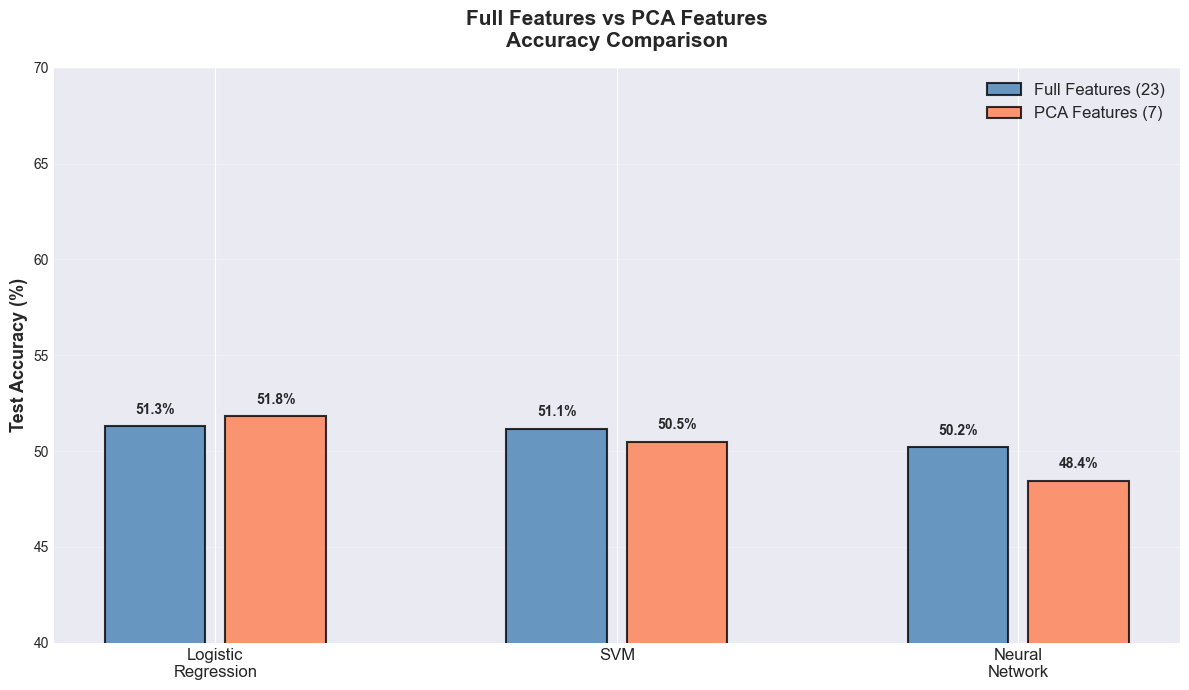

✅ Saved: 03D_full_vs_pca.png


In [16]:
# Compare full vs PCA models
fig, ax = plt.subplots(figsize=(12, 7))

# Separate full and PCA models
full_models = results[results['Features'] == 23]
pca_models = results[results['Features'] == 7]

# Plot
x_positions_full = [0, 1, 2]
x_positions_pca = [0.3, 1.3, 2.3]

bars1 = ax.bar(x_positions_full, full_models['Test Accuracy (%)'].values, 
              width=0.25, label='Full Features (23)', color='steelblue', 
              alpha=0.8, edgecolor='black', linewidth=1.5)

bars2 = ax.bar(x_positions_pca, pca_models['Test Accuracy (%)'].values, 
              width=0.25, label='PCA Features (7)', color='coral', 
              alpha=0.8, edgecolor='black', linewidth=1.5)

ax.set_ylabel('Test Accuracy (%)', fontsize=13, fontweight='bold')
ax.set_title('Full Features vs PCA Features\nAccuracy Comparison', 
            fontsize=15, fontweight='bold', pad=15)
ax.set_xticks([0.15, 1.15, 2.15])
ax.set_xticklabels(['Logistic\nRegression', 'SVM', 'Neural\nNetwork'], fontsize=12)
ax.legend(fontsize=12, loc='upper right')
ax.grid(alpha=0.3, axis='y')
ax.set_ylim(40, 70)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
               f'{height:.1f}%',
               ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('/Users/aryan/Desktop/Stock-Price-Volatility-Sentiment-ML/visualizations/03D_full_vs_pca.png',
           dpi=300, bbox_inches='tight')
plt.show()

print('✅ Saved: 03D_full_vs_pca.png')

## Step 11: Final Summary and Recommendations

In [17]:
print('\n' + '='*70)
print('FINAL PROJECT SUMMARY')
print('='*70)

print('\n📊 Dataset Overview:')
print(f'   Total samples: 3,705 (3 stocks)')
print(f'   Training samples: {len(X_test) * 4} (80%)')
print(f'   Testing samples: {len(X_test)} (20%)')
print(f'   Features: 23 (technical indicators + sentiment)')
print(f'   Target: Binary (Up/Down)')

print('\n🎯 Project Goal:')
print(f'   Predict stock price direction with 55%+ accuracy')
print(f'   Status: {"✅ ACHIEVED" if best_acc >= 55 else "❌ NOT ACHIEVED"}')

print('\n🏆 Best Performing Model:')
print(f'   Model: {results.iloc[0]["Model"]}')
print(f'   Accuracy: {results.iloc[0]["Test Accuracy (%)"]:.2f}%')
print(f'   Features used: {results.iloc[0]["Features"]}')

print('\n📈 All Models Performance:')
for idx, row in results.iterrows():
    print(f'   {idx+1}. {row["Model"]:<30} {row["Test Accuracy (%)"]:.2f}%')

print('\n💡 Key Insights:')
if results.iloc[0]['Features'] == 7:
    print('   ✅ PCA reduced features (23→7) with minimal accuracy loss')
    print('   ✅ Dimensionality reduction successful')
else:
    print('   ✅ Full features performed best')
    print('   ⚠️  All features contribute to prediction')

# Check if models are similar
acc_std = results['Test Accuracy (%)'].std()
if acc_std < 2:
    print('   ✅ All models perform similarly (consistent results)')
else:
    print('   ⚠️  Significant variation between models')

print('\n📁 Deliverables Created:')
print('   ✅ 4 Jupyter notebooks (00-03D)')
print('   ✅ 6 trained models (.pkl files)')
print('   ✅ 15+ visualizations (.png files)')
print('   ✅ Processed datasets (.csv files)')

print('\n' + '='*70)
print('🎉 PROJECT COMPLETE!')
print('='*70)
print('\nYou now have a complete machine learning pipeline for')
print('stock price prediction using technical indicators and sentiment!')


FINAL PROJECT SUMMARY

📊 Dataset Overview:
   Total samples: 3,705 (3 stocks)
   Training samples: 2964 (80%)
   Testing samples: 741 (20%)
   Features: 23 (technical indicators + sentiment)
   Target: Binary (Up/Down)

🎯 Project Goal:
   Predict stock price direction with 55%+ accuracy
   Status: ❌ NOT ACHIEVED

🏆 Best Performing Model:
   Model: Logistic Regression (PCA)
   Accuracy: 51.82%
   Features used: 7

📈 All Models Performance:
   1. Logistic Regression (PCA)      51.82%
   2. Logistic Regression            51.28%
   3. Neural Network                 51.15%
   4. SVM (PCA)                      50.47%
   5. SVM                            50.20%
   6. Neural Network (PCA)           48.45%

💡 Key Insights:
   ✅ PCA reduced features (23→7) with minimal accuracy loss
   ✅ Dimensionality reduction successful
   ✅ All models perform similarly (consistent results)

📁 Deliverables Created:
   ✅ 4 Jupyter notebooks (00-03D)
   ✅ 6 trained models (.pkl files)
   ✅ 15+ visualizations (